<a href="https://colab.research.google.com/github/pradyumnadehury/Credit-Card-Default-Prediction-Analysis.ipynb/blob/main/Credit_Card_Default_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:Predicting whether a customer will default on his/her credit card**

**problem Description**

This project is aimed at predicted the case of customers default payment in Taiwan.From the perspective of risk manegement,the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification-credible or not credible clients.We can use the K-S chart to evaluate which customers will default on their credit card payments.

**Data Description**

Attribute Information:

This research employed a binary variable,default payment(yes=1,No=0),as the response variable.this study reviewed the literature and used the following 23 variables as explanatory variables.

* X1:Amount of the given credit(NT dollar):it includes both the individual consumer and his/her family(supplementary)credit.

* X2:Gender(1=male,2=female)

* X3:Education(1=gradute school,2=university,3=high school,4=others)

* X4:Marital status(1=married;2=single;3=others)

* X5:Age(year)

* X6-X11:History of the past.we tracked the past monthly payment records(from april to september,2005)as follows
* X6: the repayment status in september,2005

* X7: the repayment status in August, 2005;......;X11 = the repayment status in April 2005.
* The measurement scale for the repayment status is:-1 = pay duly ;1= payment delay for the one month;2=payment delay for two month;......;8=payment delay for eight months;9 = payment delay for nine months and above.

* X12-X17: Amount of bill statement(NT dollar)

* X12 = Amount of bill statement in septemeber,2005

* X13 = Amount of bill statement in August,2005.......;X17 = Amount of bill statement in April ,2005
* X18-X23: Amount of the previous payment(NT dollar).
* X18 = Amount paid in september ,2005.
* X19 = Amount paid in August,2005;....;X23 = Amount paid in April,2005



# **Business Objective:**

The objective of the this project is to predict which customer might default in coming months.First,lets understand what do we actually mean by Credit card Default.

A credit card is a thin rectangular piece of plastic or metal issued by a bank or finalcial services company,that allows cardholders to borrow fund with to pay for goods and services with merchants that accept card for payment.

Default usually happens after six month in a row of making at least the minimum payment due,which means the person's credit card is seriously delinquent.During that time the person will be contacted by the creditor and they will want to know what the person is going to do about it.if they are not satisfied with the person response ,the account will be closed and after 180 days with no payment.reported as charged off to the credit bureaus.

The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offerd various credit instrument so as to invite minmum default.

# **Importing Libraries**

importing necessary libraries for EDA,Data visualization,Data Preprocessing and for various machine learning algorithm and its evaluations

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

import gc
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind_from_stats

from datetime import datetime
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from plotly.subplots import make_subplots
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score, recall_score
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.precision', 2 )
pd.set_option('display.max_columns', 50)

# **Loading Dataset**

In [113]:
#Mounted the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
from pathlib import Path
src_file=Path.cwd()/'/content/drive/MyDrive/Data/default of credit card clients.xls'
cred_df=pd.read_excel(src_file,header=1)

# **# Understanding the Dataset**

In [115]:
#Glancing through top 5 rows
cred_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [116]:
#Glancing through bottom 5 rows of the data
cred_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [117]:
#getting the shape of rows and columns present in our dataset.
print(f'There are {cred_df.shape[0]} record and {cred_df.shape[1]} features in the dataset')

There are 30000 record and 25 features in the dataset


In [118]:
#Getting all the feature names
print('Feature in the dataset')
cred_df.columns

Feature in the dataset


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [119]:
# checking the basic struture of the dataset
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [120]:
#Getting the unique value count of each feature
cred_df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


In [121]:
# checking the descriptive statistics of the feature of the dataset
cred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.50,8660.40,1.0,7500.75,15000.5,22500.25,3.00e+04
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1.00e+06
SEX,30000.0,1.60,0.49,1.0,1.00,2.0,2.00,2.00e+00
EDUCATION,30000.0,1.85,0.79,0.0,1.00,2.0,2.00,6.00e+00
MARRIAGE,30000.0,1.55,0.52,0.0,1.00,2.0,2.00,3.00e+00
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,7.90e+01
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.00e+00


As we can see:there is large difference in mean and median for bill paid and bill generated features indicating skemed distribution of data.We will plot them to understand the distribution and outliers if present any.The 'default payment next month' is the target variable.
    
The average value for the amount of credit card limit is 167484.the standard deviation is usally large,max value being 1000000.

Since the averge of education is 1.85 we can say that education is mostly gradute school and university.

Average age is 35.5 years,with a standard deviation of 9.2

As the value 0 for default payment means 'not default' and value 1 means 'default',the mean of 0.22 means that there are 22% of credit card contract that will default next month(will verify this in the next sections of this analysis)

# **Feature Description**

following is the description of our features:

ID:ID of each client

LIMIT_BAL:Amount of the given credit in NT dollors

SEX:Gender(1=male,2=female)

EDUCATION:(1=gradute school,2=university,3=high school,0,4,5,6=others)

MARRIAGE:Marital status(0=others,1=married,2=single,3=others)

AGE: age in years

Scale for PAY_0 and PAY_6:

(-2,-1,0 = paid duly, 1 = payment delay for one month,2 = payment delay for two months,.......8 = payment delay for eight months,9 = payment delay for nine month and above)

PAY_0:Repayment status in september,2005(scale same as above)

PAY_2:Repayment status in August,2005(scale same as above)

PAY_3:Repayment status in july,2005(scale same as above)

PAY_4:Repayment status in June,2005(scale same as above)

PAY_5:Repayment status in May,2005(scale same as above)

PAY_6:Repayment status in April,2005(scale same as above)

BILL_AMT1:Amount of bill statement in september,2005(NT dollar)

BILL_AMT2:Amount of bill statement in August,2005(NT dollar)

BILL_AMT3:Amount of bill statement in JULY,2005(NT dollar)

BILL_AMT4:Amount of bill statement in June,2005(NT dollar)

BILL_AMT5:Amount of bill statement in May,2005(NT dollar)

BILL_AMT6:Amount of bill statement in April,2005(NT dollar)

PAY_AMT1:Amount of previous payment in September,2005(NT dollar)

PAY_AMT2:Amount of previous payment in August,2005(NT dollar)

PAY_AMT3:Amount of previous payment in July,2005(NT dollar)

PAY_AMT4:Amount of previous payment in June,2005(NT dollar)

PAY_AMT5:Amount of previous payment in May,2005(NT dollar)

PAY_AMT6:Amount of previous payment in April,2005(NT dollar)

default.payment.next.month:Default payment,our target variable(1=yes,0=no)

In our dataset we got customer credit card transaction history for past 6 months,On basis of which we have to predict if customer will default or not.







# **Data Preparation:Cleancing and Preprocessing**

In data preparation ,we treat the raw data to enhance its quality and reliability,In order to do so ,we perform follows checks:


  1.Handling Missing Values

  2.Handling duplicates

  3.Improper struture structure and formats

  4.Handling outliers

# **Missing value Check**

Why do we need to handle missing values?

Missing values could be a result of data corruptions or failure to record data in real world data.During preprocessing ,it is one of very initial and important
step since many machine learning algorithm throws errors for missing values.They
should be handled carefully as per the problem statement else,it might lead to errorous data and deviated insighted.it is very important to understand how missing values should be treated.

In [122]:
#Checking for count of missing values in each column
#printing the sum of total missing values in the dataset.

print(f'Total null values are :{cred_df.isnull().sum().sum()}')

# checking missing values for every individual feature

cred_df.isnull().sum()

Total null values are :0


,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


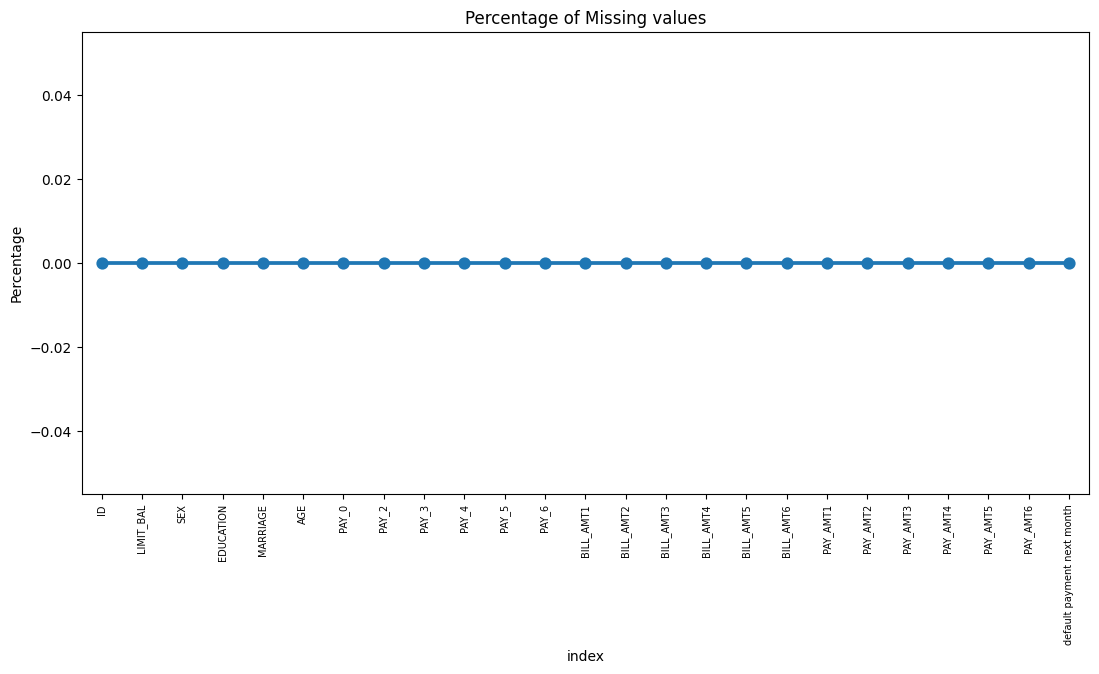

In [123]:
#plot the graph to check the missing values in the dataset

missing= pd.DataFrame((cred_df.isnull().sum())*100/cred_df.shape[0]).reset_index()
plt.figure(figsize=(13,6))
ax=sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage of Missing values')
plt.ylabel("Percentage")
plt.show()

**As we can see from above plot,luckily we don't have any missing values in the dataset.**

# **Duplicate Value Check**

**Why is it important to remove duplicate records from data?**

Duplication means redundant duplicate records in the dataset.This could be possibly due to the data entry errors or data collection method.

Removing duplicates from our data set could save investment as it may increase the size of data unnecessary.Also it could increase the complexity of data while analysis

In [124]:
# Checking the duplicate values
duplicate_value = cred_df.duplicated()
#storing the total duplicated values in the dataset in a variable
print('Total duplicate values in the dataset',duplicate_value)

Total duplicate values in the dataset 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool


**There are no missing values as well as there are no duplicate records in the dataset.**

# **Improper struture and formats**

Improper struture of data is crucial step from analysis perspective.We should look into the fact the datatype assigned is actually correct pertaining to the data or not.Our goal is to make the dataset more readible and clean so we can perform EDA with effective approach.

In [125]:
#Rename the columns
cred_df.rename(columns={'LIMIT_BAL':"credit_limit",'SEX':'gender','EDUCATION':'education','MARRIAGE':'marital_status',
                        'AGE':'age','PAY_0':'payment_status_sept','PAY_2':'payment_status_aug','PAY_3':'payment_status_jul',
                        'PAY_4':'payment_status_jun','PAY_5':'payment_status_may',"PAY_6":'payment_status_apr','BILL_AMT1':'bill_sept',
                        'BILL_AMT2':'bill_aug','BILL_AMT3':'bill_jul','BILL_AMT4':'bill_jun','BILL_AMT5':'bill_may','BILL_AMT6':'bill_apr',
                        'PAY_AMT1':'payment_amount_sept','PAY_AMT2':'payment_amount_aug','PAY_AMT3':'payment_amount_jul','PAY_AMT4':'payment_amount_jun',
                        'PAY_AMT5':'payment_amount_may','PAY_AMT6':'payment_amount_apr','dpnm':'default_payment','default payment next month':'IsDefault'
                        },inplace=True)

In [126]:
#converting the catagorical features into object datatype
cred_df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul','payment_status_jun','payment_status_may',
         'payment_status_apr']]=cred_df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul','payment_status_jun','payment_status_may',
         'payment_status_apr']].apply(lambda x:x.astype('object'))

cred_df.info()#checking whether the datatype has updated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   30000 non-null  int64 
 1   credit_limit         30000 non-null  int64 
 2   gender               30000 non-null  object
 3   education            30000 non-null  object
 4   marital_status       30000 non-null  object
 5   age                  30000 non-null  int64 
 6   payment_status_sept  30000 non-null  object
 7   payment_status_aug   30000 non-null  object
 8   payment_status_jul   30000 non-null  object
 9   payment_status_jun   30000 non-null  object
 10  payment_status_may   30000 non-null  object
 11  payment_status_apr   30000 non-null  object
 12  bill_sept            30000 non-null  int64 
 13  bill_aug             30000 non-null  int64 
 14  bill_jul             30000 non-null  int64 
 15  bill_jun             30000 non-null  int64 
 16  bill

In [127]:
# we can either drop the id column,or we can set id column as the index
cred_df.set_index('ID',inplace=True)
cred_df

,credit_limit,gender,education,marital_status,age,payment_status_sept,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,IsDefault
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


# **Handling outlier**

In simple terms,an outliers is an extremely high or extremely low data point relative to the nearest data point and rest of the neighboring co-existing values in a data graph or dataset you are working with.

In [ ]:
#lets check the distribution of dataset and the if any outliers are present.

#plotting a violin plot for all numerical features
feat_num = cred_df.select_dtypes(include =['int64', 'float64'])

plt.figure(figsize=(25,25))
n=1

for column in feat_num:
  plt.subplot(6,4,n)
  n = n+1
  sns.boxplot(x=column, data=cred_df, color='skyblue')
  sns.violinplot(x=column, data=cred_df)

plt.tight_layout()
plt.show()



As we can see,the distribution is close to normal distribution,but we do have many outliers present,which needs to get needed to get treated.

# **Treating Outlier**

Here,as the dataset does not follow exact normalisation.Hence we will use IQR method to detect the outlier and remove them.

In [ ]:
#creating a for loop to iterate over  and capp all the outliers on entire numerical features
for i in feat_num:
  p25 = feat_num[i].quantile(0.25) #creating a variabel for 25th percentile
  p75 = feat_num[i].quantile(0.75) #creating a variabel for 75th percentile
  iqr = p75-p25 #calculating the  interquartile range
  upper_limit = p75 + 1.5 * iqr # caculating the upper bound limit, above which the data will be considered outlier
  lower_limit = p75 - 1.5 * iqr # # caculating the lower bound limit, below  which the data will be considered outlier

  print(f'For {i} Upper limit is {upper_limit}, and lower limit is {lower_limit}') # printing the upper and lower limit of each feature

  feat_num[cred_df[i] > upper_limit] #to check the outlier record
  feat_num[cred_df[i] < lower_limit] #to check the outlier record
  new_df_cap = feat_num.copy() #definig new dataframe to store the oulier capped dataset
  new_df_cap[i] = np.where(new_df_cap[i] > upper_limit, upper_limit,
    np.where(new_df_cap[i] < lower_limit, lower_limit,new_df_cap[i])) # replacing the outliers with the  specifed limits

#ploting a figure to compare the difference in distribution of data
  plt.figure(figsize = (16,15))
  plt.subplot(2,2,1)
  sns.distplot(cred_df[i])
  plt.title(f'Distplot of {i}')
  plt.subplot(2,2,2)
  sns.boxplot(data=new_df_cap,x=i)
  plt.title(f'Boxplot  of {i}')
  plt.subplot(2,2,3)
  sns.distplot(new_df_cap[i])
  plt.title(f'Distplot of outlier capping on {i}')
  plt.subplot(2,2,4)
  sns.boxplot(data=new_df_cap,x=i)
  plt.title(f'Boxplot of outlier capping on  {i}')



# **Exploratory Data Analysis:**

Why do we perform EDA?

An EDA  is a through examination meant to uncover the underlying struture of a dataset and is important for a company because it exposes trends,patterns,and relationships that are not readily apparent.

# **Univariable analysis**

Why do you do univariate analysis?

The key objective of univariate analysis is to simply describe the data and visulise various features to find patterns within the data.

# **Analysis of Dependent Variable:**

In [ ]:
#plotting the count plot to visualise the data distributions
def_cnt=(cred_df.IsDefault.value_counts(normalize=True)*100) # calculate percentage of a datapoints.Normalise is used to divide the total into each of the category present in the dataset
def_cnt.plot.bar(figsize=(10,6),color=['brown','mediumaquamarine'])#ploting a bar
plt.xticks(fontsize=12,rotation=0)#adjusting size and adding x ticks ,rotations = 0 means the x labels will be same.
plt.yticks(fontsize=12)
plt.title("Probability of Default payment Next Month",fontsize=15) #title of plot
for x,y in zip([0,1],def_cnt):
  plt.text(x,y,y,fontsize=12)
plt.show()

In [ ]:
#checking the balance of the dependent variable by counting the variable of each unique set.
cred_df['IsDefault'].value_counts()

# **Observations:**

0 - Not Default

1 - Default

1. There is a huge difference between both classes so we have to work on this class imbalance.

2. About 22% people are expected to default next month and 77.8% are not expected to default.

# **Independent Variables:**

Categorical Features:

Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories.These groups may consist of alphabetic
(e.g,male ,  female) or numeric labels  (eg,male=0,female=1) that do not contain mathematical information beyond the frequency counts related to group membership.

lets check how they are related with our target .We have few categorical features in our dataset.
lets check how they are related  with out target class.

gender:1-Male,2-Female

In [ ]:
#change gender code to "F" and "M" and use category as datatype to get better readability
cred_df['gender']=cred_df['gender'].map({1:'M',2:'F'}).astype('category')
cred_df['gender'].dtypes


In [ ]:
#understanding the distribution of male and female in the dataset
cred_df['gender'].value_counts(normalize=True)

# **Observation:**

Most of the credit card users are female which counts to 60% of total data.

Education

1=gradute school;2=university;3=high school;4= others

In [ ]:
#counting the fraction of educational diversity
cred_df['education'].value_counts()

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4,which is others.

In [ ]:
combine_df=(cred_df['education']==5) |(cred_df['education']==6)|(cred_df['education']==0)
cred_df.loc[combine_df,'education']=4
cred_df['education'].value_counts(normalize=True)

# **Observation:**

Majority of the users are university students counting to around 47% of total counts.


Marriage

1=married,2=single,3=others

In [ ]:
#checking marital status
cred_df['marital_status'].value_counts()

Only few values are there for class 0,which is not determined also.so i am adding them in others category.

In [ ]:
m_comb = cred_df['marital_status']==0
cred_df.loc[m_comb,'marital_status']=3
cred_df['marital_status'].value_counts(normalize=True)

# **Observation:**

Majority,around 53% of credit card were owned by married customer.

**payment_status_sept**

-1=pay duly;1 = payment delay for one month;2 = payment delay for two months;.....;8 = payment delay for 8 months;9=payment delay for nine months and above.

In [ ]:
# checking previous month payment status
cred_df['payment_status_sept'].value_counts()

since,there are 0,-2,02 are also present,but as per our stated description,we know that -1 is paid on time.So we will merge all these columns to -1.

In [ ]:
pay_comb=(cred_df['payment_status_sept']==0)|(cred_df['payment_status_sept']==-2)#getting the set of values containing -2,0 by creating condition
cred_df.loc[pay_comb,'payment_status_sept'] = -1 # mapping the condition to replace -1
cred_df['payment_status_sept'].value_counts(normalize=True)*100 #checking the percentage of data


# **Observation:**

around 77% customers paid the september bill on time

# **payment_status_aug**

In [ ]:
#checking previous month payment status
cred_df['payment_status_aug'].value_counts()
#Since ,there are 0.-2,02 are also present,but as per our stated description,
#we know that -1 is paid on time,so we will merge all these columns to -1.
pay_comb_aug=(cred_df['payment_status_aug']==0)|(cred_df['payment_status_aug']== -2)#getting the set containing -2,0 by creating condition
cred_df.loc[pay_comb_aug,'payment_status_aug']= -1 #mapping the condition  to replace those with -1
cred_df['payment_status_aug'].value_counts(normalize=True) #checking the count of data

# **Observation:**

Around 85% customers has paid the bill of august on time

# **Payment_status_jul:**

In [ ]:
#checking previous month payment status
cred_df['payment_status_jul'].value_counts()
#Since ,there are 0.-2,02 are also present,but as per our stated description,
#we know that -1 is paid on time,so we will merge all these columns to -1.
pay_comb_aug=(cred_df['payment_status_jul']==0)|(cred_df['payment_status_jul']== -2)#getting the set containing -2,0 by creating condition
cred_df.loc[pay_comb_aug,'payment_status_jul']= -1 #mapping the condition  to replace those with -1
cred_df['payment_status_jul'].value_counts(normalize=True) #checking the count of data

# **Observation:**

Around 86% customers had paid july bill on time

# **payment_status_jun:**

In [ ]:
#checking previous month payment status
cred_df['payment_status_jun'].value_counts()
#Since ,there are 0.-2,02 are also present,but as per our stated description,
#we know that -1 is paid on time,so we will merge all these columns to -1.
pay_comb_aug=(cred_df['payment_status_jun']==0)|(cred_df['payment_status_jun']== -2)#getting the set containing -2,0 by creating condition
cred_df.loc[pay_comb_aug,'payment_status_jun']= -1 #mapping the condition  to replace those with -1
cred_df['payment_status_jun'].value_counts(normalize=True) #checking the count of data

# **Observation:**

Around 88% of customers had paid the june bill on time

# **payment_status_may**


In [ ]:
#checking previous month payment status
cred_df['payment_status_may'].value_counts()
#Since ,there are 0.-2,02 are also present,but as per our stated description,
#we know that -1 is paid on time,so we will merge all these columns to -1.
pay_comb_aug=(cred_df['payment_status_may']==0)|(cred_df['payment_status_may']== -2)#getting the set containing -2,0 by creating condition
cred_df.loc[pay_comb_aug,'payment_status_may']= -1 #mapping the condition  to replace those with -1
cred_df['payment_status_may'].value_counts(normalize=True) #checking the count of data

# **Observation**

Around 90% of the customer has the paid the may bill on time.

# **Payment_status_Apr**

In [ ]:
#checking previous month payment status
cred_df['payment_status_apr'].value_counts()
#Since ,there are 0.-2,02 are also present,but as per our stated description,
#we know that -1 is paid on time,so we will merge all these columns to -1.
pay_comb_aug=(cred_df['payment_status_apr']==0)|(cred_df['payment_status_apr']== -2)#getting the set containing -2,0 by creating condition
cred_df.loc[pay_comb_aug,'payment_status_apr']= -1 #mapping the condition  to replace those with -1
cred_df['payment_status_apr'].value_counts(normalize=True) #checking the count of data

# **Observation:**

Around 89% of the customer paid duly the April bill

Overall,around 80% of the customers had paid the previous month bill on time,The defaulter rate was very less.

# **Plotting the categorical features:**

In [ ]:
#creating a datafreme to store the categorical features
categorical_features = ['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul','payment_status_jun',
                        'payment_status_may','payment_status_apr','age']

In [ ]:
# saving requried feature in a new dataframe to ease the analysis
cat_df = cred_df[categorical_features]
cat_df['Defaulter'] = cred_df['IsDefault']

In [ ]:
#Since the values were label encoded.We are decoding the labels for  clearer visualization
cat_df.replace({'gender':{1:'MALE',2 :'FEMALE'},
                'education':{1 :'graduate school',2 :'university',3 :'high school',4:'others'},
                'marital_status':{1:'Married',2 :'Single',3 :'Others'}},inplace=True)

In [ ]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig,axes = plt.subplots(ncols=2,figsize=(13,8))
  cred_df[col].value_counts().plot(kind='pie',ax=axes[0],subplots=True)
  sns.countplot(x = col, hue= 'Defaulter',data=cat_df)

# **Observaion:**

1.Since there are more female credit card holder the no of defaulter have high proportion of females.

2.No of defaulters have a higher proportion of educated people(graduate school and university)

3.In case of 'Marital_status' both singles and married people are having high proportion in No of defaulters,but proportion of singles are higher by a small amount.

--> Since there are more female than male in the dataset,we canot say females tends to have more delayed payments.So we will use percentage within each sex group and plot the results.

In [ ]:

# Create a new column "has_def" to indicate customers who have at least 1 deafult payment from April to September
# 0 : no default ; 1: has default

def_condition = (cred_df.payment_status_sept >1) | (cred_df.payment_status_aug >1) | (cred_df.payment_status_jul >1) | (cred_df.payment_status_jun >1) | (cred_df.payment_status_may >1) | (cred_df.payment_status_apr >1)
cred_df.loc[def_condition, "has_def"] = 1
cred_df.loc[cred_df.has_def.isna(), "has_def"] = 0

In [ ]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=cred_df['has_def'],columns = cat_df[column_name], normalize = 'columns')

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns #creating label for the plot
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"

    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5

    #plotting the bar chart
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name, color = 'mediumaquamarine')
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name, color = 'brown')

#formatting the plot
    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

 #adding x and y ticks
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

#to annotate the plot
    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="black", fontsize=11)
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="k", fontsize=11)

    plt.show()

In [ ]:
# Plot a stacked bar chart to visualize default percentage by female and male

create_stacked_bar('gender')

# **Observation:**

Since we aware not able to comment on female defaulter being at majority by the previous data.Now,it is clear through were female defaulter but the rate of being defaulter is comparatively higher in males with 30% of total defaulers compared to 26% of females defaulter respectively.

In [ ]:
#Plot a stacked bar chart to show defaulter as per marital status
create_stacked_bar('marital_status')

# **Observation:**

As we can see in chart ,we can infer that there is quite similar distribution of defaulter in each category indicating marital status does not influence the defaulter customers.However dominant category for defaulter is others.

-->since there are more educated people than people with basic high_school qualification,we can't say educated people tended to have more delayed payment.so we will use percentage within each education group and plot the results.

In [ ]:
#plot a stacked bar chart to show default by education level
create_stacked_bar('education')

# **Observation:**

The data indicates customers with  lower education levels default more,Customers with high school and university educational level had higher defaulter percentage than  customers with grad school education.

In [ ]:
#boxplot to visualise credit limit grouped by education level
data = []
for i in [1,2,3,4]:
  temp = cred_df.loc[cred_df.education == i,"credit_limit"]#
  data.append(temp)#created a list which stored the data that satisfied the above given condition

fig,ax=plt.subplots()
ax.boxplot(data)#plotting a box plot
ax.set_xticklabels(["grad school","university","high school","others"])#setting the tick labels
plt.show()

# **Observation:**

From the boxplot,it is clear thatr customers with grad school education have the highest median and highest maximun number,so we can say that people with higher education levels did get higher credit limit.

--> lets find out people at what age missing payment deadline most.

In [ ]:
#Checking the descriptive stat of Limit Balance feature in the dataset
cred_df['credit_limit'].describe()
#plotting the distribution of limit balance feature
plt.figure(figsize=(10,5))
sns.distplot(cred_df['credit_limit'],kde=True)
plt.show()

# **Observation:**

Maximum amount of givenn credit is 50000 NT dolloar followed by 30000 and 20000

In [ ]:
# Segment the 'AGE' column to 6 groups
bins= [21,30,40,50,60,70,80] #creating bins
labels = ['20-30','30-40','40-50','50-60','60-70','70-80'] #Labelling the age interval
cat_df['age'] = pd.cut(cat_df['age'],bins=bins,labels=labels,right=False)

In [ ]:
create_stacked_bar('age')

# **Observation:**

Customers aged between 30-50 had the lowest delayed payment rate,While younger groups(20-30) and older groups(50-70) all had higher delayed payment rates.However ,the delayed rate dropped slightly again in customers older than 70years.

-->Lets check the correlation between credit limit and default payment next month.

In [ ]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

def0 = cred_df.loc[cred_df['IsDefault'] == 0,'credit_limit']
def1 = cred_df.loc[cred_df['IsDefault'] == 1,'credit_limit']

#plotting the figure
fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

#formattting the plot
ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')


plt.show()



# **Observation:**

Customer with high credit limits tend to pay the pay on time and hence are not defaulters.

--->Understanding relations between bill amount and payment done in 6 months

In [ ]:
cred_df.columns #show columns

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=cred_df.payment_status_sept,y=cred_df.bill_aug,color='red',s=1)
plt.subplot(232)
plt.scatter(x=cred_df.payment_status_aug,y=cred_df.bill_aug,color='blue',s=1)
plt.subplot(233)
plt.scatter(x=cred_df.payment_status_jul,y=cred_df.bill_aug,color='green',s=1)

plt.subplot(234)
plt.scatter(x=cred_df.payment_status_jun,y=cred_df.bill_aug,color='yellow',s=1)
plt.subplot(235)
plt.scatter(x=cred_df.payment_status_may,y=cred_df.bill_aug,color='orange',s=1)
plt.subplot(236)
plt.scatter(x=cred_df.payment_status_apr,y=cred_df.bill_aug,color='pink',s=1)
plt.suptitle('relation between bill amount and payment done in 6 months')
plt.show()




# **Observation:**

Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.

This we can infer since maximum of data points are closely packed along the y-axis near to 0 on X-axis.

--->Total bill amount

In [ ]:
#assign the bill amount variable to a single variable

total_bill_amt_df=cred_df[['bill_sept','bill_aug','bill_jul','bill_jun','bill_may',"bill_apr",'IsDefault']]
#plotting pair plot for bill amount for better  visualisation
sns.pairplot(data=total_bill_amt_df,hue ="IsDefault",palette = 'hls');

# **Observation:**

The above pairplot indicates that defaulter have less bill compared to non defaulers.

---->Why are there negative bills?

In [ ]:
#get statistic summary of bill statement columns
bill = cred_df[['bill_apr',"bill_may","bill_jun","bill_jul","bill_aug","bill_sept"]]
bill.describe()

We do have negative bill value as well in the dataset.Lets understand more the possible reason for negative bill.

In [ ]:
#How many bills have negative amount?
bill_melt = pd.melt(bill,var_name="bills",value_name="count")#to change the dataframe format
neg_bill = bill_melt[bill_melt['count']<0]
neg_bill.groupby('bills').count() #counting the negative bill

There are 3932 bills with negative amounts ,each month has 590-688 records

In [ ]:
#get the average amount of negative bill each month
neg_bill_mean_ndt=neg_bill.groupby('bills')['count'].mean()
print('Average negative amount are :\n')
print(neg_bill_mean_ndt)

In [ ]:
neg_bill_mean_ndt.describe()

# **Observation:**

The average negative amount is 1698 NDT which is very less when comparing with total bill amount of each months so we can guess that this would be refunds from the last billing cycles.

---> Why are some bill statement amounts greater than credit limit?

In [ ]:
from threading import Condition
# Is there any bill amount that is greater than credit limit?
#checking for such bill amount in a dataset
condition1 = cred_df['bill_apr'] > cred_df['credit_limit']
condition2 = cred_df['bill_may'] > cred_df['credit_limit']
condition3 = cred_df['bill_jun'] > cred_df['credit_limit']
condition4 = cred_df['bill_jul'] > cred_df['credit_limit']
condition5 = cred_df['bill_aug'] > cred_df['credit_limit']
condition6 = cred_df['bill_sept'] > cred_df['credit_limit']

Large_bill=cred_df[condition1|condition2|condition3|condition4|condition5|condition6]
Large_bill.shape

# **Observation:**

The bill statement amount should not exceed credit limit,however there are 3931 customers whose bill amounts greater than credit limit.May be the difference is due to late payment interest,assuming these customers had delayed payment.

--->Lets check is there any customer who never had any transaction,meaning bill amount in 6 months remained as 0.

In [ ]:
#checking the customer who has bill amount as 0 in last 6 month
bill_amt = cred_df[['bill_apr','bill_may',"bill_jun","bill_jul","bill_aug","bill_sept"]]
no_transaction = bill_amt[bill_amt.sum(axis=1)==0]
no_transaction

In [ ]:
no_transaction.shape

There are 870 customers whose bill amount was 0 in last 6 months.

---> Now,lets check if those 870 customers defaulted in the month(oct 2005)

In [ ]:
# checking whether those 870 customer with bill amount of 0 are defaulted in next month or not
no_transaction_de = cred_df.loc[no_transaction.index,['IsDefault']]
no_transaction_de.value_counts()

# **Observations:**

317 customers whose bill amount was 0 in last 6 months had default payment which is against common sense.Lets assume these were happened due to some errors and we will convert it into class "0" while doing feature engineering.

# **Correlations:**

Now that we have dealt with categorical variables and the outliers,lets continue with the EDA.One way to try and understood the data is by looking for coorelations between the features and the target.We can calculate the pearson coefficient  is not the greatest method to represent "relevence"of a feature.but it does give us an idea of possible relationship within the data.Some general interpretations of the absolute value of the coorelations coeffient are:

1.00-19 "very weak"

2.20-.39 "weak"

3.40-.59 "moderate"

4.60-.79 "strong"

5.80-1.0 "very strong"

In [ ]:
cred_df.columns

In [ ]:
cred_df.info()

In [ ]:
cred_df1 = cred_df.astype({
    'education': 'int64',
    'marital_status': 'int64',
    'payment_status_sept': 'int64',
    'payment_status_aug': 'int64',
    'payment_status_jul': 'int64',
    'payment_status_jun': 'int64',
    'payment_status_may': 'int64',
    'payment_status_apr': 'int64'
})


In [ ]:
cred_df1.info()

In [ ]:
cred_df1.drop(columns=['gender'], inplace=True)


In [ ]:
#plotting a heat  map to understand correlations between features
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cred_df1.corr(),annot=True,cmap='YlGnBu', ax=ax);

Since most of the features are categorical a heatmap doesnot give much insights about the coorelations so lets some statistical method.

In [ ]:
cred_df2=cred_df1.drop(columns=['education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul','payment_status_jun','payment_status_may','payment_status_apr'])

In [ ]:
# plotting the features importance as per pearson correlation
X = cred_df2.drop(['IsDefault','has_def'],axis=1)#dropping column which are not required at present
X.corrwith(cred_df2['IsDefault']).plot.bar(figsize=(15,5),title='Correlation with Default',fontsize=10,rot=90,grid=True)#creating a bar plot of correlation of featuires

# **Observation:**


it seems from the above graph is that most negatively correlated feature is credit_limit,but we cannot blindly remove this feature because it is a very importance feature for prediction .ID is not important and it has no role in prediction so we will remove it while doing feature engineering.

# **Statistical Analysis for Correlation**

1.Correlation between credit_limit and bill_amount:pearson R

2.Correlation between credit_limit and payment_default:t-test

3.Correlation between education and payment default:chi-squared test

4.Correlation between age and payment default:chi-squared test

5.Correlation between sex and payment default:permutation test

6.Correlation between sex and credit limit :t test



**Correlation between credit limit and bill amount.**

we assure that customers who have a high credit limit will have a higher bill amount.

In [ ]:
#finding whether the customer with high credit limit has high bill amount as well
cred_df['bill_sum']=cred_df[['bill_apr','bill_may','bill_jun','bill_jul','bill_aug','bill_sept']].sum(axis=1)
credit_bill = cred_df[['credit_limit','bill_sum']]
credit_bill.corr()

In [ ]:
#calculating person correlation between the credit limit and bill amount
credit_limit = cred_df['credit_limit']
bill_amount = cred_df[['bill_apr','bill_may','bill_jun','bill_jul','bill_aug','bill_sept']].sum(axis=1)
stats.pearsonr(credit_limit,bill_amount)

The pearson R shows there is a slight positive correlation of 0.3 between these 2 variables.

# **Correlation between credit limit and payment default:**

ideally,we should have customers income data,but since this data is not available,we can assume higher income customer have higher credit limits.Therefore ,we will verify if there is correlation between credit limit and default payment using t-test

1. Null hypothesis:credit limit does not affect default likelihood

2. Alternative hypothesis : credit limit impact default likelihood

3. Set significance level to 0.05

In [ ]:
#storing the required variables
no_def_limit = cred_df2.loc[cred_df2['has_def']==0,'credit_limit']
def_limit = cred_df2.loc[cred_df2['has_def']==1,'credit_limit']

In [ ]:
#performing t test to find the coorelation by importing ttest
ttest_ind_from_stats(mean1=np.mean(no_def_limit),std1=np.std(no_def_limit),nobs1=len(no_def_limit),
                     mean2=np.mean(def_limit),std2=np.std(def_limit),nobs2=len(def_limit))

# **Observation:**

We get p value as 0,therefore we need to reject the null hypothesis and accept the alternative hypothesis.Credit limit has an impact on payment default.

**Correlation between education and payment default**

Previous visulisation indicates education impact default likelihood.We will use a Chi squared test to verify this findings

1.Null hypothesis:education does not affect default likelihood.

2.Alternative hypothesis:education impacts default likelihood

3.Set significance level to 0.05



In [ ]:
#Get the contigence table of education and default data
edu_def_contigence = pd.crosstab(cred_df['has_def'],cred_df['education'],margins=False)

In [ ]:
#Use chi-squared test to test if education affects default likelihood
stat,p,dof,expected = chi2_contingency(edu_def_contigence)
p

Since the p value is close to 1,we will accept the Null hypothesis.This feature doesnot any impact on our target variable.

**Correlation between age and payment default:**

Previous visualization indicates education impact default likelihood.we will use a chi squared test to verify this finding.



1.Null hypothesis:education does not affect default likelihood

2.Alternative hypothesis: education impact default liklihood.

3.Set significance to 0.05

In [ ]:
#get the contingence table of age and default data
age_def_contingence = pd.crosstab(cred_df['has_def'],cred_df['age'],margins=False)

In [ ]:
age_def_contingence

In [ ]:
#Use chi-squared test to test if age affects default likelihood
stat,p,dof,expected = chi2_contingency(age_def_contingence)
p

The p value is larger than signifance level,we will accept the Null hypothesis and Conclude that age does not has impact on default probability.

**Correlation between sex and payment default:**

Previous visualization it appears males tend to default more than females .Does sex have any correlations with default or was  this observation due to chance event? lets find out with permutation test on each group default proportions and mean respectively.

1.Null hypothesis:education does not affect default likelihood

2.Alternative hypothesis: education impact default liklihood.

3.Set significance to 0.05

In [ ]:
#get the true difference of 'HAS_DEF' proportions of two groups
male = cred_df.loc[cred_df['gender']=='M','has_def']
female = cred_df.loc[cred_df['gender']=='F','has_def']
true_diff_prop = male.sum()/len(male) - female.sum()/len(female)#calculating proportion
true_diff_prop

In [ ]:
#define functions to do permulation test
def permutation_sample(data1,data2):
  data = np.concatenate((data1,data2))
  permuted_data = np.random.permutation(data)
  perm_sample_1 = permuted_data[:len(data1)]
  perm_sample_2 = permuted_data[len(data1):]
  return perm_sample_1,perm_sample_2
def diff_of_prop(data1,data2):#calculating the proportion
  diff=data1.sum()/len(data1)-data2.sum()/len(data2)
  return diff

def draw_perm_reps(data1,data2,func,size=1):
  perm_replicates = np.empty(size)
  for i in range(size):
    perm_sample_1,perm_sample_2 = permutation_sample(data1,data2)
    perm_replicates[i] = func(perm_sample_1,perm_sample_2)

  return perm_replicates


In [ ]:
#Draw 10000 permutation tests
perm_replicates = draw_perm_reps(male,female,diff_of_prop,size=10000)

In [ ]:
#Calculate p value - the probability of getting a mean difference equal or greater than the observed mean difference
p = np.sum(perm_replicates >= true_diff_prop)/len(perm_replicates)
p

# **Test conclusions**

since the p value is 0,we should reject the null hypothesis and accept the alternative hypothesis,which is Sex has impact on default liklihood.To be more concrete in this case,male customers tend to default more.

**Correlations between credit limit and sex.**

Since we know the credit limit is strongly correlated with default probability.
lets see if sex plays any role in credit limit and default likelihood.

1.Null hypothesis : Sex has no impact on credit limit

2.Alternate hypothesis:sex has impact on credit limit.

3.Set significance level to 0.05

In [ ]:
# calculate the true mean difference of credit limit

male_limit = cred_df.loc[cred_df['gender']=='M','credit_limit']
female_limit = cred_df.loc[cred_df['gender']=='F','credit_limit']
print(np.mean(male_limit),np.mean(female_limit))

In [ ]:
#Use t-test to verify if different sex groups have the same mean of credit limit
ttest_ind_from_stats(mean1=np.mean(male_limit),std1=np.std(male_limit),nobs1=len(male_limit),
                     mean2=np.mean(female_limit),std2=np.std(female_limit),nobs2=len(female_limit))

The p-value is much higher than sigma,so we will accept null hypothesis and accept alternative hypothesis.We have verifed that sex plays a role in credit limit and it is not due to chance.

**Feature Engineering**

Lets a take a look at all columns corresponding to customers whose bill amount was 0 in last 6 months.

In [ ]:
#customer with no consumption for the past 6 months

fil = ((cred_df.bill_apr == 0)&(cred_df.bill_may == 0)&(cred_df.bill_jun == 0)&(cred_df.bill_jun == 0)&(cred_df.bill_jul == 0)&(cred_df.bill_aug == 0)&(cred_df.bill_sept == 0))
cred_df[fil][['payment_amount_apr','payment_amount_may','payment_amount_jun','payment_amount_jul','payment_amount_aug',
              'payment_amount_sept','bill_apr','bill_may','bill_jun','bill_jul','bill_aug','bill_sept','payment_status_apr',
              'payment_status_may','payment_status_aug','payment_status_sept']].head(10)

I was just confirming whether any payment status given as wrong for this 316 people .Thankfully the dataset seems correct.

# **One Hot encoding:**

Lets create a copy of our dataset for further processing

In [ ]:
cred_df_copy = cred_df[['credit_limit','gender','education','marital_status','age','payment_status_sept',
                        'payment_status_aug','payment_status_jul','payment_status_jun','payment_status_may','payment_status_apr',
                        'bill_sept','bill_aug','bill_jul','bill_jun','bill_may','bill_apr','payment_amount_sept',
                        'payment_amount_jul','payment_amount_aug','payment_amount_may','payment_amount_jun','payment_amount_apr','IsDefault','bill_sum']]

In [ ]:
#One hot encode all the categorical features
#Lets convert categorical features into object dtype first
cred_df_copy[['gender','marital_status','education','payment_status_sept','payment_status_aug','payment_status_jul','payment_status_jun','payment_status_may','payment_status_apr']] = cred_df_copy[['gender','marital_status','education','payment_status_sept','payment_status_aug','payment_status_jul',
             'payment_status_jun','payment_status_may','payment_status_apr']].astype('object')
#One hot encoding
cred_df_copy = pd.get_dummies(cred_df_copy)
cred_df_copy

In [ ]:
cred_df_copy.head()

# **Feature Selection:**

Three benifits of performing feature selections before modeling your data are:

1.Reduces Overfitting :Less redundants data means less opporttunity to make decisions based on noise.

2.Improve Accurarcy : Less misleading data means modelling accuracy improves.

3.Reduces Training Time:Less data means tha algorithm train faster.

**Feature importance:**

Feature importance gives us a score for each feature of our data.the higher the
score more important or relevant is the feature towards our output variable.

Feature importance is an bulit classs that comes with Tree Based Classified ,we
will be using Extra Tree Classifier for Extracting the top 20 features for our
datasets

In [ ]:
#Split the cred_df_copy into train and test sets
X_d = cred_df_copy.drop(columns=['IsDefault'],axis=1)
y_d=cred_df_copy['IsDefault']


In [ ]:
model = ExtraTreesClassifier()
model.fit(X_d,y_d)
plt.figure(figsize=(15,10))
print('feature_importances of Tree based classifiers:\n',model.feature_importances_)#use inbulit class feature_importance of tree based classifier
#plot graph of feature importances for better visualisation
feat_importances = pd.Series(model.feature_importances_,index=X_d.columns)
feat_importances.nlargest(23).plot(kind='barh',color = 'green')

**Feature Selection using ANOVA F-test:**

In [ ]:
num_feats = 23
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100),max_features=num_feats)
embeded_rf_selector.fit(X_d,y_d)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_d.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)),'selected features')

In [ ]:
print('selected features:\n',embeded_rf_feature)

In [ ]:
#selected_features in new dataframe
df_new = cred_df_copy[['IsDefault','credit_limit','age','bill_sept','bill_aug','bill_jul','bill_jun','bill_may','bill_apr','payment_amount_sept','payment_amount_aug','payment_amount_jul',
                       'payment_amount_jun','payment_amount_may','payment_amount_apr','bill_sum','payment_status_sept_-1','payment_status_sept_2','payment_status_aug_-1','payment_status_aug_2','payment_status_jul_-1']]

**Train-test Split & Sampling:**

we have already seen in EDA that there is a class imbalance for our target variable.we can apply some method to deal it.3 ways for doing imbalanced classification problems.

1. Random Oversampling:Randomly duplicate examples in the minority class,which
has the disadvantage of incresing the likilihood of overfitting since it replicates the minority class event.

2. Random undersampling:Randomly delete examples in this mojority class,which has discard potentially useful information and the sample can be biased.

3. SMOTE:synthetic minority oversampling technique.

We will be using SMOTE for class balancing.

In [ ]:
#split the df_new into train and test sets
X = df_new.drop(columns=['IsDefault'],axis=1)
y = df_new['IsDefault']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

In [ ]:
#checking the distribution of the samples in the train dataset
#separate majority and minority classes
df_majority = df_train[df_train.IsDefault==0]
df_minority = df_train[df_train.IsDefault==1]

major_percent=df_majority.IsDefault.count()/df_train.shape[0]*100
minor_percent=df_minority.IsDefault.count()/df_train.shape[0]*100

print('Customer with no default payment next month:')
print(f'{df_majority.IsDefault.count()}({round(major_percent,2)}%)')
print("----------")
print('customers with Default payment next month:')
print(f'{df_minority.IsDefault.count()}({round(minor_percent,2)}%)')
print("----------")
#the imbalanced train dataset

In [ ]:
#SMOTE:Synthesis minority oversampling Technique

sm = SMOTE(random_state=42)
X_SMOTE,y_SMOTE = sm.fit_resample(X_train,y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

So we have 1 sets of training data:Train data with SMOTE algorithm

In [ ]:
##original Dataset
xtrain_data = [X_SMOTE]
ytrain_data = [y_SMOTE]
name =['SMOTE']

# **Predictive Models:**

# **Metrics**

for evalution,we choose recall as the metric as we would like to predict which
customers are likely to have default payment next month based on prudence--we rather overestimate the pothential loss/short of income flow than underestimate
it in the perspective of cash flow control and risk management.we want to identify as many default customer as possible even though some of them are not actually defaulted.Recall is the ratio of true positive over the sum of True positive and false negative which is the probability that we predict correctly.

In [ ]:
# Define a function which evaluates the model with train and test score
# And also performs a K-fold cross validation on the train dataset


def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))
    print('Overall Train recall',recall_score(ytrain,y_pred))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]

    #print('confusion matrix-test\n',confusion_matrix(ytest,y_test_pred))
    print('Overall Test Accuracy\n',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score\n',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))


    # kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    # score=[]
    # for train_idx,test_idx in kf.split(Xtrain,ytrain):
    #     xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
    #     ytrain_k,ytest_k = ytrain.iloc[train_idx],ytrain.iloc[test_idx]
    #     algo.fit(xtrain_k,ytrain_k)
    #     y_pred_k = algo.predict(xtest_k)
    #     roc = roc_auc_score(ytest_k,y_pred_k)
    #     score.append(roc)

    # print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))

    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()



# **1.Logistic Regression:**

In [ ]:
for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
    global best_log
    print('Data is ',sampleName)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {'C': np.logspace(-5, 8, num = 15)}
    ss = StandardScaler()
    standardized_Xtrain = ss.fit_transform(Xtrain)
    standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)

    # Instantiate a logistic regression classifier
    logreg = LogisticRegression()
    # Instantiate the RandomizedSearchCV object
    logreg_cv = RandomizedSearchCV(logreg, param_grid ,scoring = 'recall', cv=5, random_state=0)
    # Fit it to the data
    logreg_cv.fit(standardized_Xtrain_df,ytrain)
    best_log.append(logreg_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
    print("_" * 100)

In [ ]:
#best parameter of each Sampling Method
param_log = [{'C':0.0007196856730011522}]

In [ ]:
# Result of each Sampling Method

index = [0]

for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',sampleName ,' And with hyper parameter ', param_log[index])
    ss = StandardScaler()
    standardized_Xtrain = ss.fit_transform(Xtrain)
    standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
    standardized_Xtest = ss.transform(X_test)
    model_eval(LogisticRegression(**param_log[index],random_state= 42), standardized_Xtrain_df ,ytrain,standardized_Xtest,y_test)
    print("_" * 60)


In [ ]:
#Find out the best parameters for all the datasets
for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
  print('Data is ',sampleName)
  #instantiate a Decision tree classifier:tree
  dtc = DecisionTreeClassifier(random_state=42)
  #Setup the parameter and distributions to sample from :param_dist
  params = {'max_depth':sp_randint(2,20),
            'min_samples_leaf':sp_randint(1,20),
            'min_samples_split':sp_randint(2,40),
            'criterion':['gini','entropy']}
  #instantiate  the randomizedsearchcv object :tree_cv
  rsearch_dt = RandomizedSearchCV(dtc,param_distributions=params,cv =5,scoring='recall',n_iter = 100,n_jobs=-1)
  #fit it to the data
  rsearch_dt.fit(Xtrain,ytrain)
  print("Tuned Decision Tree parameters:{}".format(rsearch_dt.best_params_),"For",sampleName)
  print("_"*100)

In [ ]:
#best parameter of each Sampling Method:
param_dt = [{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 13}]

In [ ]:
#Result of each Sampling Method

index = [0]
for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
  print('Data is ',sampleName,'And with hyper parameter',param_dt[index])
  model_eval(DecisionTreeClassifier(**param_dt[index],random_state=42),Xtrain,ytrain,X_test,y_test)
  print("_"*60)

In [ ]:
#Plotting feature importance based on Decision Tree:
features = X_train.columns
importances = rsearch_dt.best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importance based on Decision Tree')
plt.barh(range(len(indices)),importances[indices],color='g',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **2.Random Forest**

A random forest clssifier:A random forest is meta estimator that fits a number of decision tree classifiers on various sub_samples of the dataset and uses averaging to improve the predictive accuracy and control over_fitting.

In [ ]:
for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
    global best_rf
    best_rf =[]
    print('Data is ',sampleName)
    # Instantiate a Random forest classifier: tree
    rfc = RandomForestClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'n_estimators' : sp_randint(50,200),
              'max_features' : sp_randint(1,24),'max_depth': sp_randint(2,10),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,20),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object
    rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 3, scoring = 'recall',n_iter = 50,random_state = 42,n_jobs = -1,pre_dispatch  = "2*n_jobs",return_train_score = True)

    # Fit it to the data
    rsearch_rfc.fit(Xtrain, ytrain)
    best_rf.append(rsearch_rfc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(rsearch_rfc.best_params_), "for",sampleName)
    print("_" * 100)



In [ ]:
#Best Parameter of each Sampling Method
param_rf = [{'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 7, 'n_estimators': 90}]

In [ ]:
#Result of each Sampling Method
index =[0]
for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
  print('Data is',sampleName,'And with hyper parameter',param_rf[index])
  model_eval(RandomForestClassifier(**param_rf[index],random_state = 42),Xtrain,ytrain,X_test,y_test)
  print('_'* 60)

In [ ]:
#plotting feature importance based on Random Forest
features = X_train.columns
importances = rsearch_rfc.best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,5))
plt.title('Feature Importance based on Random Forest')
plt.barh(range(len(indices)),importances[indices],color='green',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **4. K Nearest Neighbour Classifier**

In [ ]:
#find out the best parameters for all the datasets
for Xtrain,ytrain in zip(xtrain_data,ytrain_data):
  global best_knn
  best_knn = []
  print('Data is ',sampleName)
  #Set the hyperparameter grid, (not scaled data)
  param_grid = {
      "n_neighbors":[500,800,1000,1500,2000],
      'leaf_size':[5,10,20,30,50],
  }
  #Instantiate a support vector classifier
  knn_clf = KNeighborsClassifier()
  #Instantiate the RandomizedSearchCV object
  randomknn_clf = RandomizedSearchCV(knn_clf,param_grid,refit =True,verbose=3,scoring='recall',cv=3,random_state=0)
  #fit it to the data
  randomknn_clf.fit(Xtrain,ytrain)
  best_knn.append(randomknn_clf.best_params_)
  #print the tuned parameter and score
  print("Tuned KNN parameters:{}".format(randomknn_clf.best_params_))
  print("_" * 100)

In [ ]:
#Best Parameter of each Sampling Method
param_knn=[randomknn_clf.best_params_]

In [ ]:
# Result of each Sampling Method
index =[0]
for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
  print('Data is',sampleName,'And with hyper parameter ',param_knn[index])
  model_eval(KNeighborsClassifier(**param_knn[index]),Xtrain,ytrain,X_test,y_test)
  print('_'*60)

# **Conclusion**

1. there was an imbalance in the target variable which was balanced using SMOTE(Synthetic Minority OverSampling Technique)

2. Logistic Regression,Decision Trees,Random Forest algorithm were implemented .
The important metric to compare all the algorithm in this case is "RECALL".As the company can not afford to predict False negative.ie predict defaulter as a non defaulter . since ,company is one,who will give a to money to the customers.
if,for any reason giving to money to defaulter is gaining more risk to getting
the investment back.Hence,here identifying false negative is important.

3. Logistic Regression had an imbalance in the recall score of about 83% for class 0 and 56% for class 1.

4. performance on Decision tree and Random Forest is comparatively better.Decision Trees and Random Forest have recall scores of 75% (class0),49% (class1) and 65%(class0),66%(class1)respectively.

5. KNN classifier could be good model but it needs further hypertuning.

6. The features like credit limit,payment amount and bill amount are importance
features as per Random Forest and Decision tree algorithm.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')